<a href="https://colab.research.google.com/github/eacb93-coder/adm/blob/main/sistema_auditoria_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import datetime
import csv # Biblioteca nativa para lidar com planilhas/tabelas

def gerar_log_sistema(filename="log_votacao_2025.csv", total_registros=10000):
    print(f"--- 🏭 Iniciando Fábrica de Dados: {total_registros} registros ---")

    header = ["ID_TRANSACAO", "DATA_HORA", "FILIAL_ORIGEM", "OPCAO_ESCOLHIDA"]

    # Filiais possíveis para dar realismo
    filiais = ["MATRIZ_SP", "FILIAL_RJ", "FILIAL_MG", "REMOTO_HOME"]

    # Pesos mantidos (Cenário Corporativo: Chapa 1 favorita)
    opcoes = [1, 2, 3, 4, 5, 6]
    pesos = [0.45, 0.20, 0.10, 0.15, 0.05, 0.05]

    try:
        # 'newline=""' é necessário para trabalhar com CSV em Windows/Mac corretamente
        with open(filename, "w", encoding="utf-8", newline="") as arquivo:
            escritor = csv.writer(arquivo, delimiter=";") # Padrão Brasil usa ponto e vírgula

            # 1. Escreve o Cabeçalho (Header)
            escritor.writerow(header)

            # 2. Gera os dados linha a linha
            # Usaremos um timestamp inicial e adicionaremos segundos aleatórios
            data_atual = datetime.datetime(2025, 12, 1, 8, 0, 0)

            # Sorteia todos os votos de uma vez (Performance)
            votos_sorteados = random.choices(opcoes, weights=pesos, k=total_registros)

            for i, voto in enumerate(votos_sorteados):
                # Simula ID único (Ex: TRX-0001)
                transacao_id = f"TRX-{10000+i}"

                # Avança o relógio aleatoriamente (entre 1 e 30 segundos por voto)
                data_atual += datetime.timedelta(seconds=random.randint(1, 30))
                data_str = data_atual.strftime("%Y-%m-%d %H:%M:%S")

                # Escolhe filial aleatória
                filial = random.choice(filiais)

                # Grava a linha
                escritor.writerow([transacao_id, data_str, filial, voto])

        print(f"✅ Sucesso! Arquivo '{filename}' gerado com estrutura profissional.")
        print(f"📂 Exemplo de linha: TRX-10000; {data_str}; {filial}; {voto}")

    except IOError as e:
        print(f"Erro de I/O: {e}")

if __name__ == "__main__":
    gerar_log_sistema()

--- 🏭 Iniciando Fábrica de Dados: 10000 registros ---
✅ Sucesso! Arquivo 'log_votacao_2025.csv' gerado com estrutura profissional.
📂 Exemplo de linha: TRX-10000; 2025-12-03 02:59:58; REMOTO_HOME; 4


🔄 INICIANDO AUDITORIA DE COMPLIANCE - 19/12/2025 09:43:29
📂 Processando arquivo: log_votacao_2025.csv...

✅ Processamento finalizado em 0.0073s
📊 Volume auditado: 10000 registros
⚠  Exceções tratadas: 0

📈 Renderizando Dashboard...


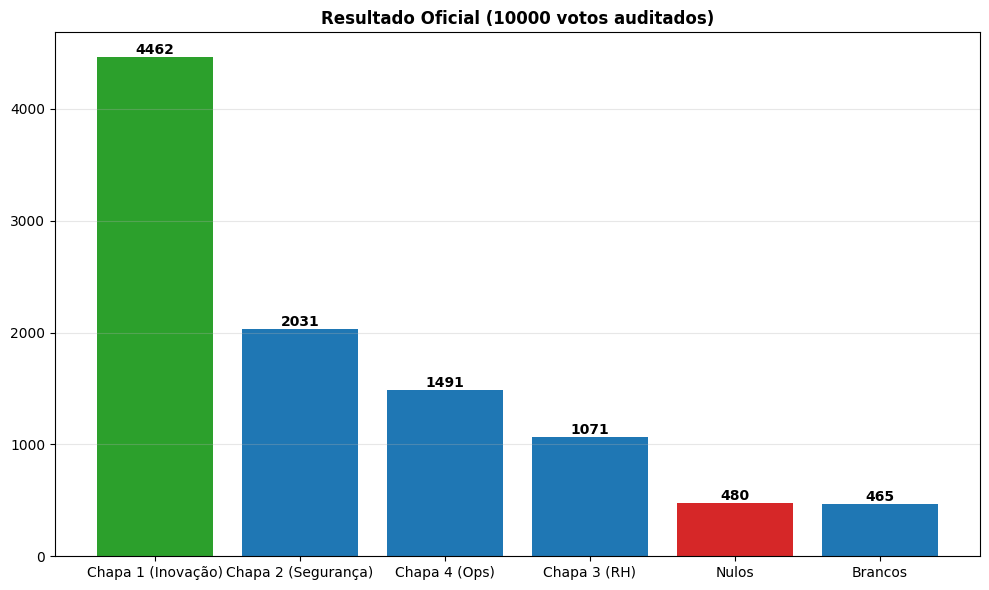

In [5]:
import matplotlib.pyplot as plt
import datetime
import time

def auditoria_log_estruturado():
    """
    Executa o pipeline de auditoria:
    1. Ingestão de arquivo CSV (Big Data simulado)
    2. ETL e tratamento de erros de parsing
    3. Geração de dashboard executivo
    """
    arquivo_alvo = "log_votacao_2025.csv"
    apuracao = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
    total_linhas = 0
    erros_leitura = 0

    # Início da medição de performance (SLA)
    inicio_processamento = time.time()
    data_auditoria = datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")

    print(f"🔄 INICIANDO AUDITORIA DE COMPLIANCE - {data_auditoria}")
    print(f"📂 Processando arquivo: {arquivo_alvo}...\n")

    try:
        with open(arquivo_alvo, "r", encoding="utf-8") as arquivo:
            # Pula o cabeçalho para evitar erro de conversão na primeira linha
            next(arquivo)

            for linha in arquivo:
                if not linha.strip(): continue

                # Parsing: Extração da coluna 3 (Voto) delimitada por ';'
                try:
                    dados = linha.strip().split(';')
                    voto = int(dados[3])

                    if voto in apuracao:
                        apuracao[voto] += 1
                    else:
                        apuracao[5] += 1 # Fallback: Votos inválidos contam como Nulos

                    total_linhas += 1

                except (IndexError, ValueError):
                    erros_leitura += 1

    except FileNotFoundError:
        print("❌ CRITICAL: Arquivo de log não encontrado."); return

    tempo_total = time.time() - inicio_processamento

    # --- Relatório de Performance ---
    print(f"✅ Processamento finalizado em {tempo_total:.4f}s")
    print(f"📊 Volume auditado: {total_linhas} registros")
    print(f"⚠  Exceções tratadas: {erros_leitura}")

    gerar_dashboard(apuracao, total_linhas)

def gerar_dashboard(apuracao, total_votos):
    # Lógica de Visualização separada para manter o código limpo (Clean Code)
    print("\n📈 Renderizando Dashboard...")

    ranking = sorted(apuracao.items(), key=lambda x: x[1], reverse=True)
    labels = []
    valores = []
    cores = []

    # Mapeamento de Chapas (Cenário Corporativo)
    nomes_chapas = {
        1: "Chapa 1 (Inovação)", 2: "Chapa 2 (Segurança)",
        3: "Chapa 3 (RH)", 4: "Chapa 4 (Ops)",
        5: "Nulos", 6: "Brancos"
    }

    # Definição de Cores por Regra de Negócio
    vencedor = ranking[0][0]
    for codigo, qtd in ranking:
        valores.append(qtd)
        labels.append(nomes_chapas.get(codigo, "Outros"))

        if codigo == vencedor and codigo <= 4:
            cores.append('#2ca02c') # Verde (Vencedor)
        elif codigo == 5:
            cores.append('#d62728') # Vermelho (Nulos)
        else:
            cores.append('#1f77b4') # Azul (Padrão)

    plt.figure(figsize=(10, 6))
    barras = plt.bar(labels, valores, color=cores)
    plt.title(f"Resultado Oficial ({total_votos} votos auditados)", fontweight='bold')
    plt.grid(axis='y', alpha=0.3)

    for barra in barras:
        plt.text(barra.get_x() + barra.get_width()/2., barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    auditoria_log_estruturado()